### EDA

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load data
df  = pd.read_csv("loan approval.csv")

# Remove 0 value
df = df[df['Loan_Amount'] != 0]
df = df[df['Income(dollar)'] != 0]

# Convert string to numerical value
df['Gender'] = df['Gender'].map({"Male": 0, "Female": 1})
df['Married'] = df['Married'].map({'Yes': 1 ,'No': 0})
df['Dependents'] = df['Dependents'].map({"0": 0, "1": 1, "2": 2, "3+": 3})
df['Education'] = df['Education'].map({'Graduate': 1 ,'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1 ,'No': 0})
df['Income'] = np.log2(df['Income(dollar)'])
df['Coapplicant'] = df['Coapplicant'].map({'Yes': 1 ,'No': 0})
df['Loan_Amount'] = np.log2(df['Loan_Amount'])
df['Term'] = np.log2(df['Term(month)'])
df['Area'] = df['Area'].map({'Urban': 1 ,'Semiurban': 2, "Rural": 3})

# Drop all row that have missing value
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Get result
classes = df["Status"].map({"Y": 1, "N": 0}).to_list()

# Drop column
df = df.drop('Status', axis=1)
df = df.drop('Term(month)', axis=1)
df = df.drop('Income(dollar)', axis=1)

### Create model and print accuracy

In [2]:
# Split data to train and test datasets
x_train, x_test, y_train, y_test = train_test_split(df, classes, test_size=0.2)

neighbors = np.arange(1, 9)

# Create model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

# Predict using test datasets
y_pred = knn.predict(x_test)

# Get model accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {int(accuracy * 100)}%")

Accuracy: 65%


### Show accuracy for each k from 1 to 10

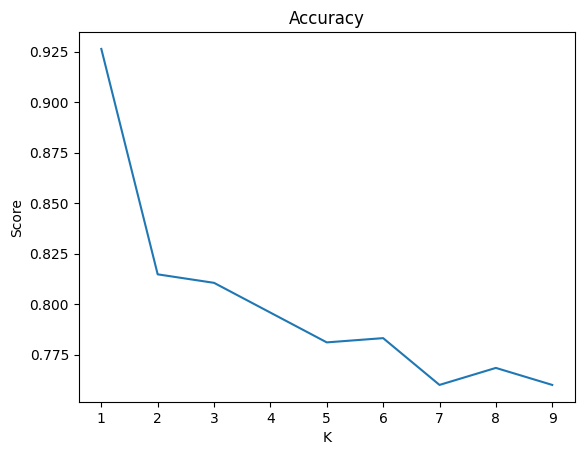

In [3]:
import matplotlib.pyplot as plt

# Random k
neighbors = np.arange(1, 10)
accuracys = np.empty(len(neighbors))

# Find all score for k
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    accuracys[i] = knn.score(df, classes)


# Show chart
plt.plot(neighbors, accuracys)
plt.title("Accuracy")
plt.xlabel('K')
plt.ylabel('Score')
plt.show()